## Filtering

Process to remove some frequencies component from a signal (usually used for removing noise)

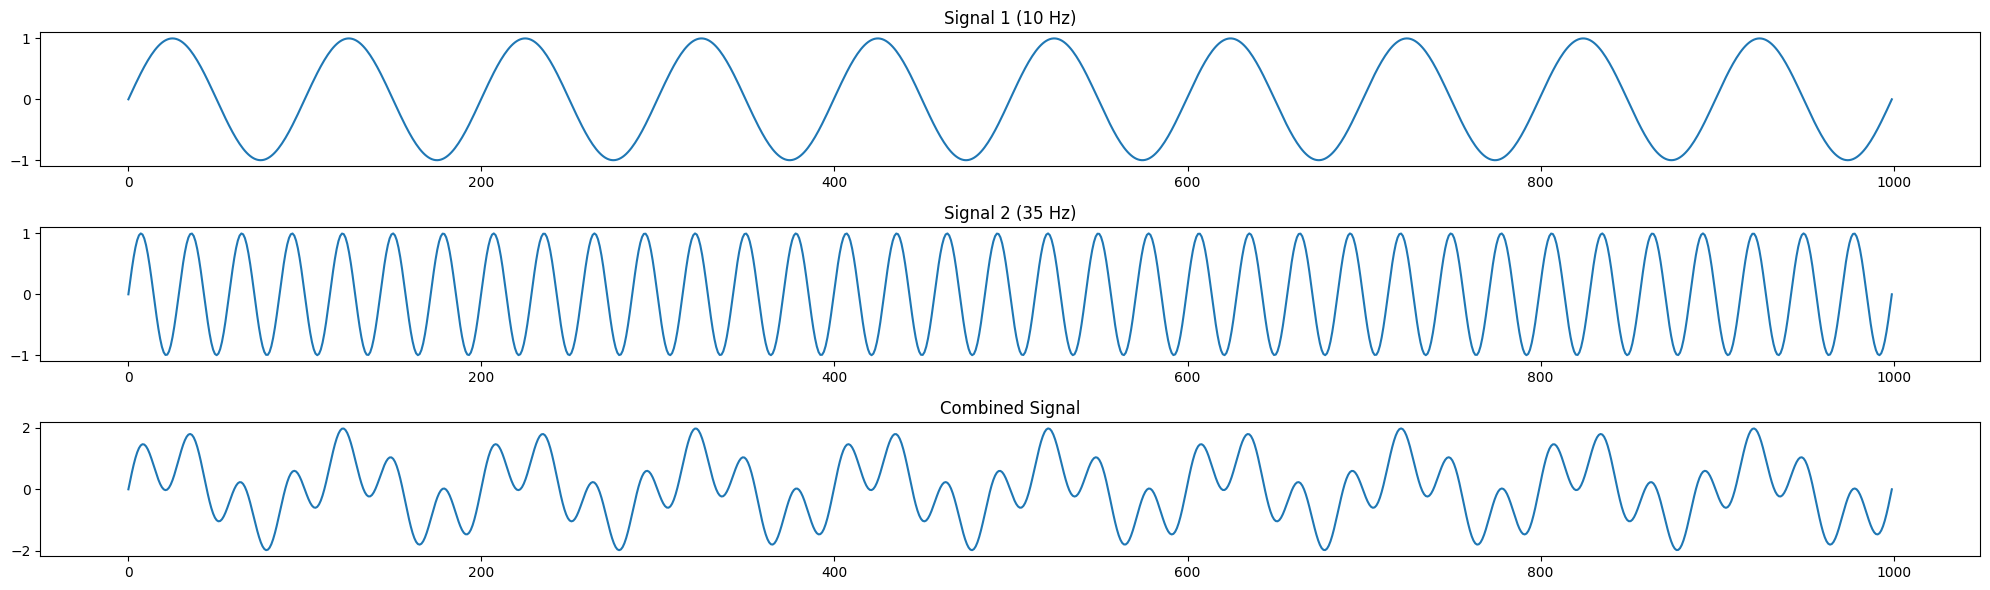

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
time_axis = np.linspace(0, 1, fs)

signal_1 = np.sin(2 * np.pi * 10 * time_axis)
signal_2 = np.sin(2 * np.pi * 35 * time_axis)
signal_combine = signal_1 + signal_2

fig, ax = plt.subplots(3, 1, figsize=(20, 6))
ax[0].plot(signal_1)
ax[0].set_title("Signal 1 (10 Hz)")
ax[1].plot(signal_2)
ax[1].set_title("Signal 2 (35 Hz)")
ax[2].plot(signal_combine)
ax[2].set_title("Combined Signal")
plt.tight_layout()
plt.show()

In [3]:
from scipy import signal
## Creating Filter
cutoff = 15 # Frekuensi cutoff dalam Hz
order = 3 # Orde filter

b, a = signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

# atau cara lain menuliskannya
# cutoff_nyquist = cutoff / (fs / 2) ## Multimedia one
# b, a = signal.butter(order, cutoff_nyquist, btype='low')

## Applied Filter
filtered_signal = signal.filtfilt(b, a, signal_combine)

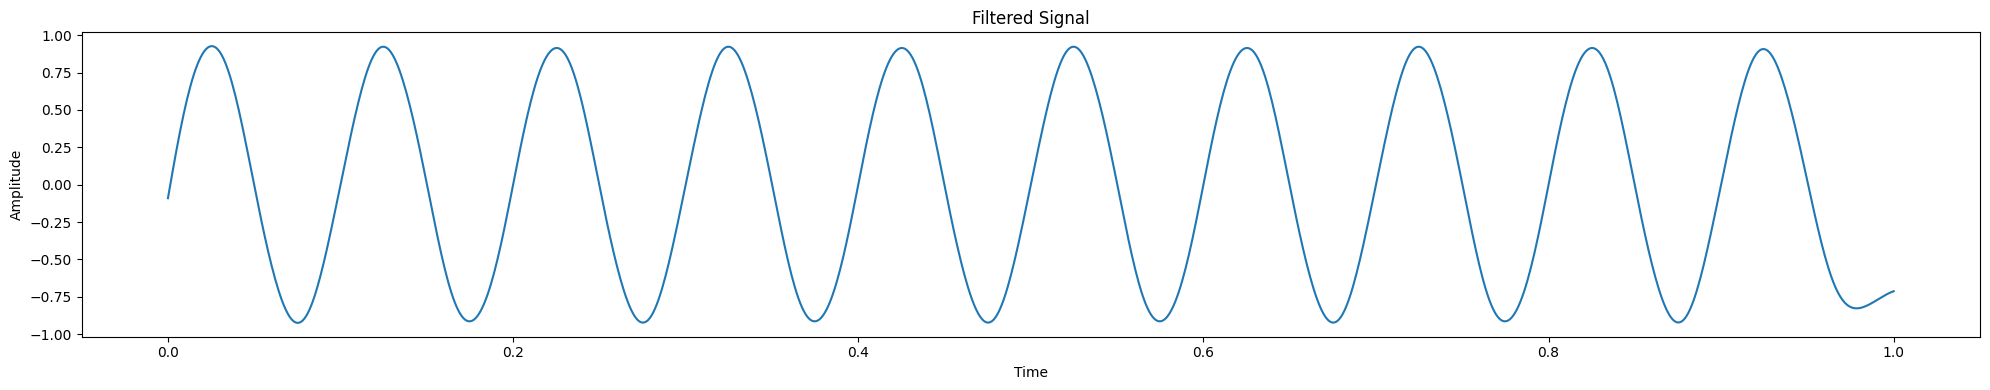

In [4]:
plt.figure(figsize=(20, 4))
plt.plot(time_axis, filtered_signal)
plt.title("Filtered Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

## Filter the low frequencies

We need the High Pass Filter then

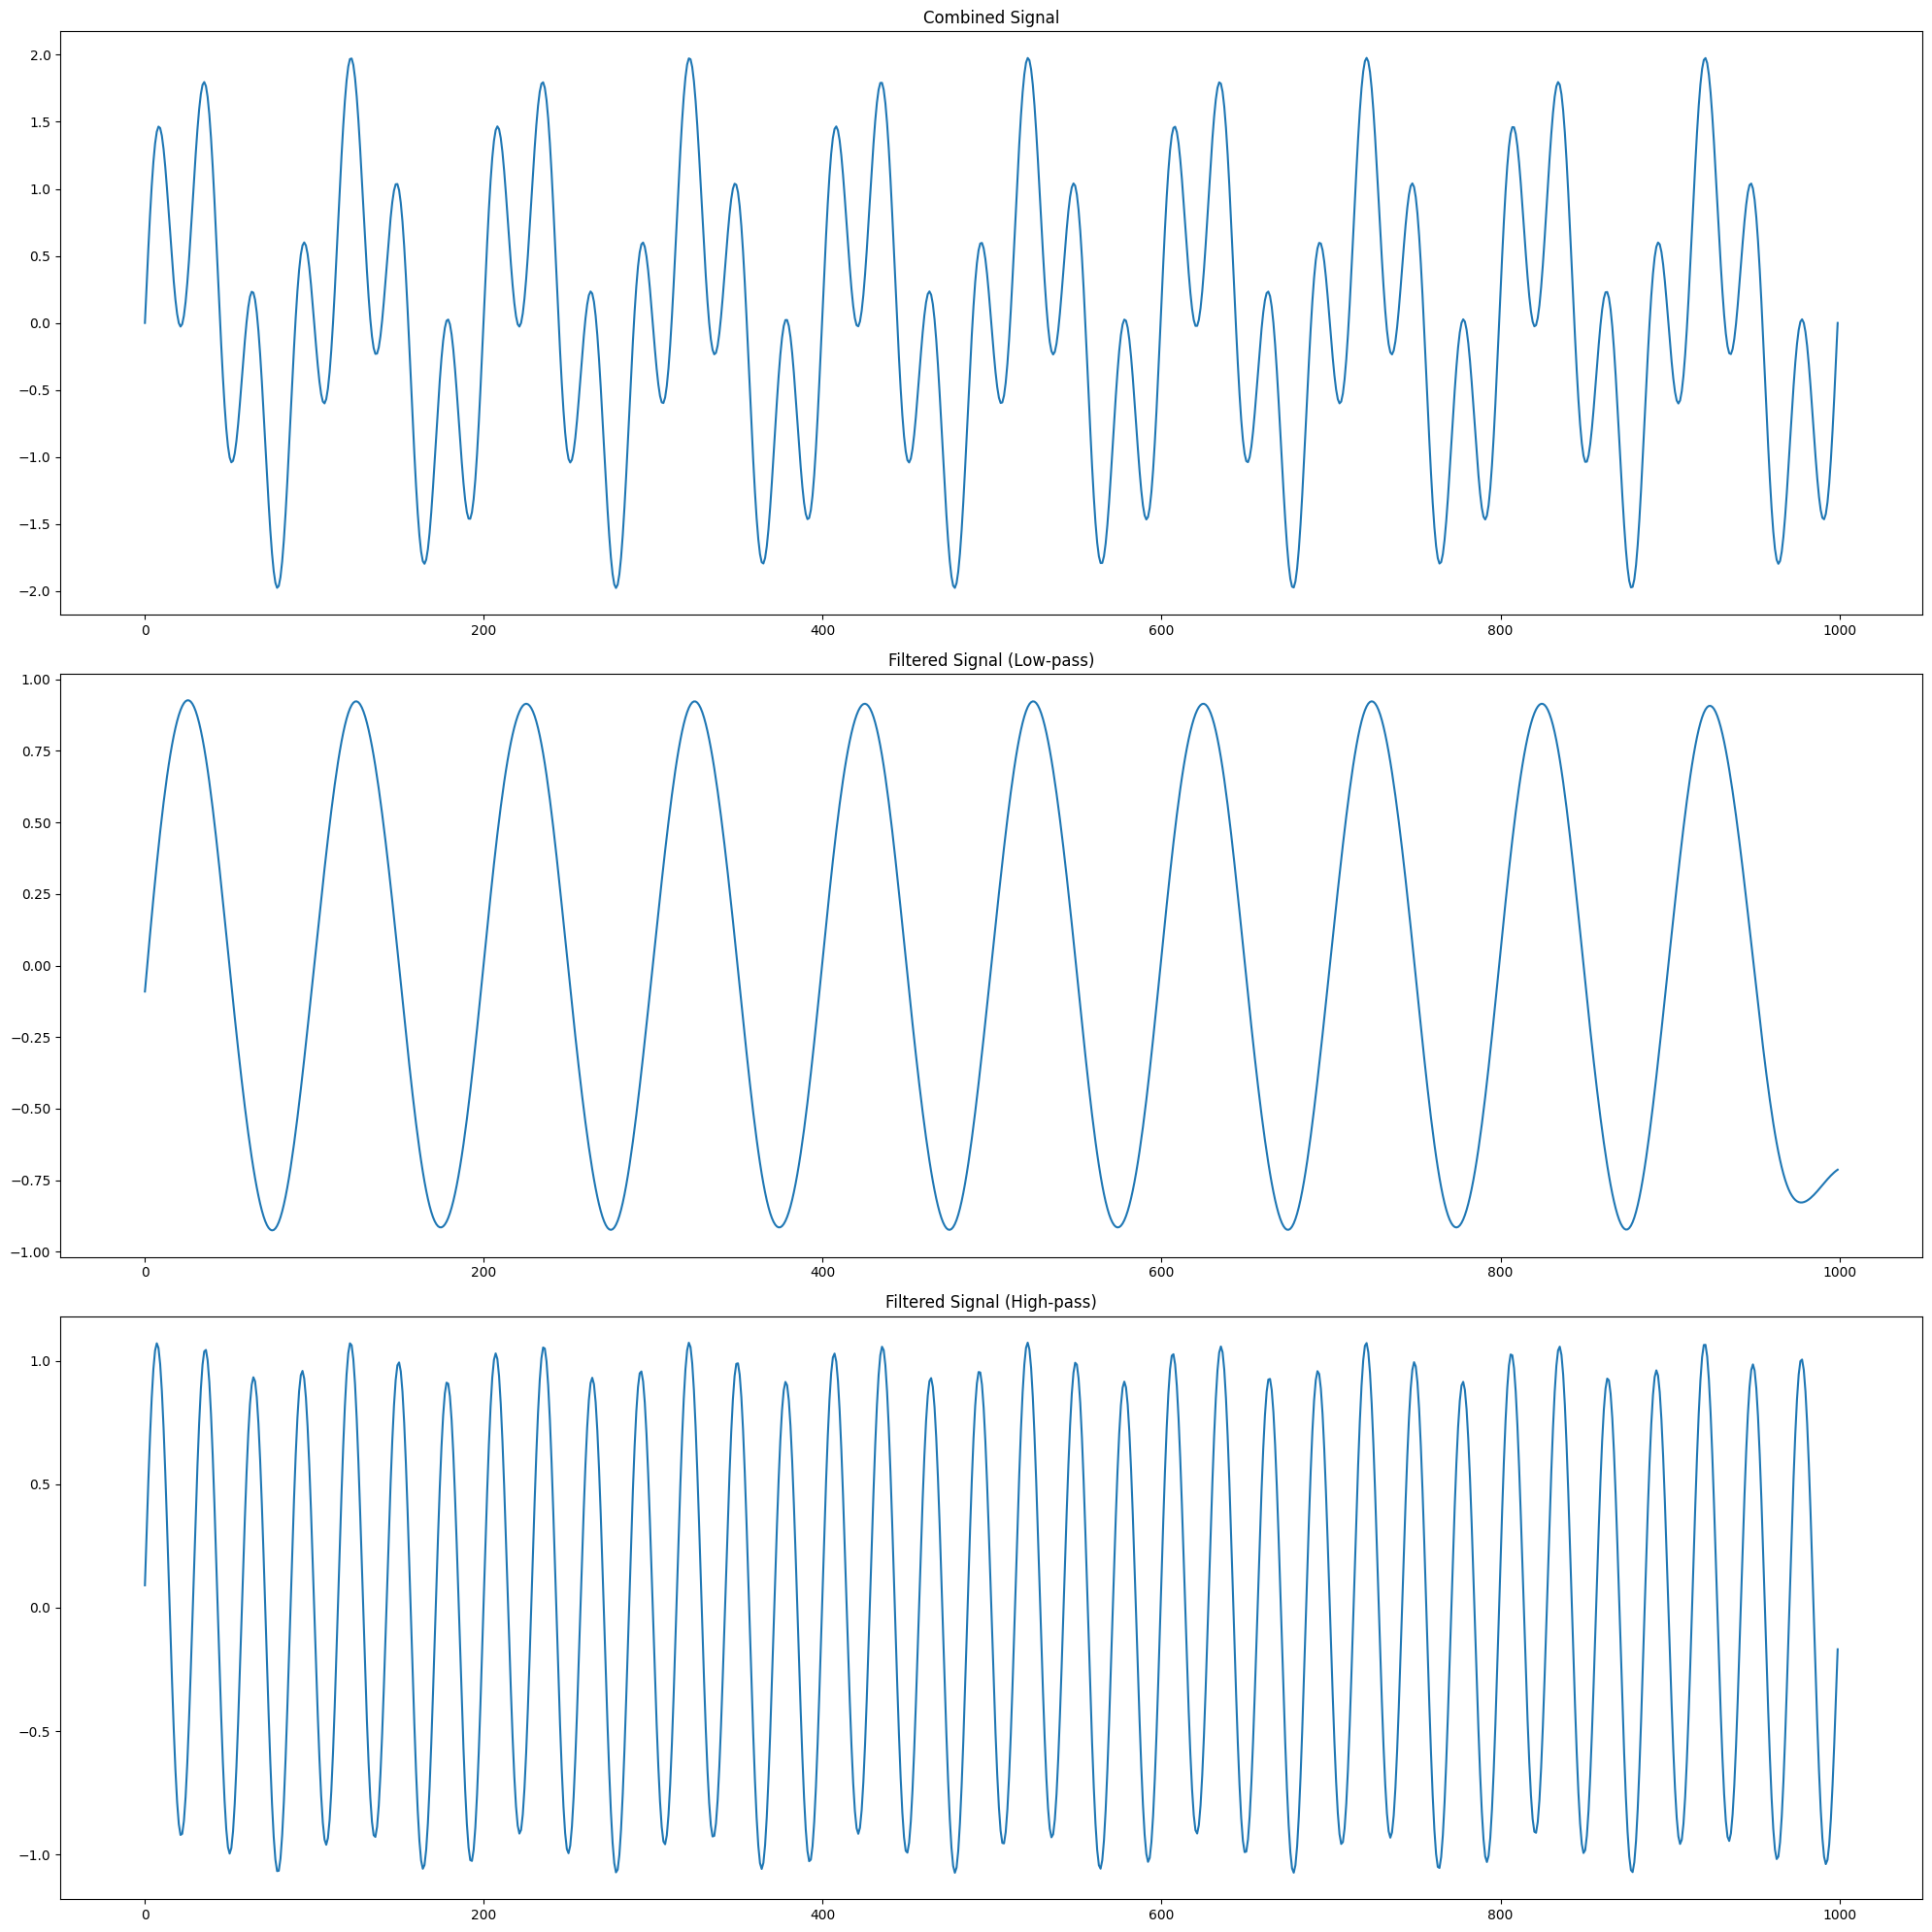

In [5]:
cutoff = 15 # Frekuensi cutoff dalam Hz
order = 3 # Orde filter

b, a = signal.butter(order, cutoff, fs=fs, btype='high', analog=False)
signal_filt_hp = signal.filtfilt(b, a, signal_combine)

fig, ax = plt.subplots(3, 1, figsize=(20, 20))
ax[0].plot(signal_combine)
ax[0].set_title("Combined Signal")
ax[1].plot(filtered_signal)
ax[1].set_title("Filtered Signal (Low-pass)")
ax[2].plot(signal_filt_hp)
ax[2].set_title("Filtered Signal (High-pass)")
plt.tight_layout()
plt.show()

## Bandpass Filter

for the case is we need to filter low and high frequencies, we can applied this

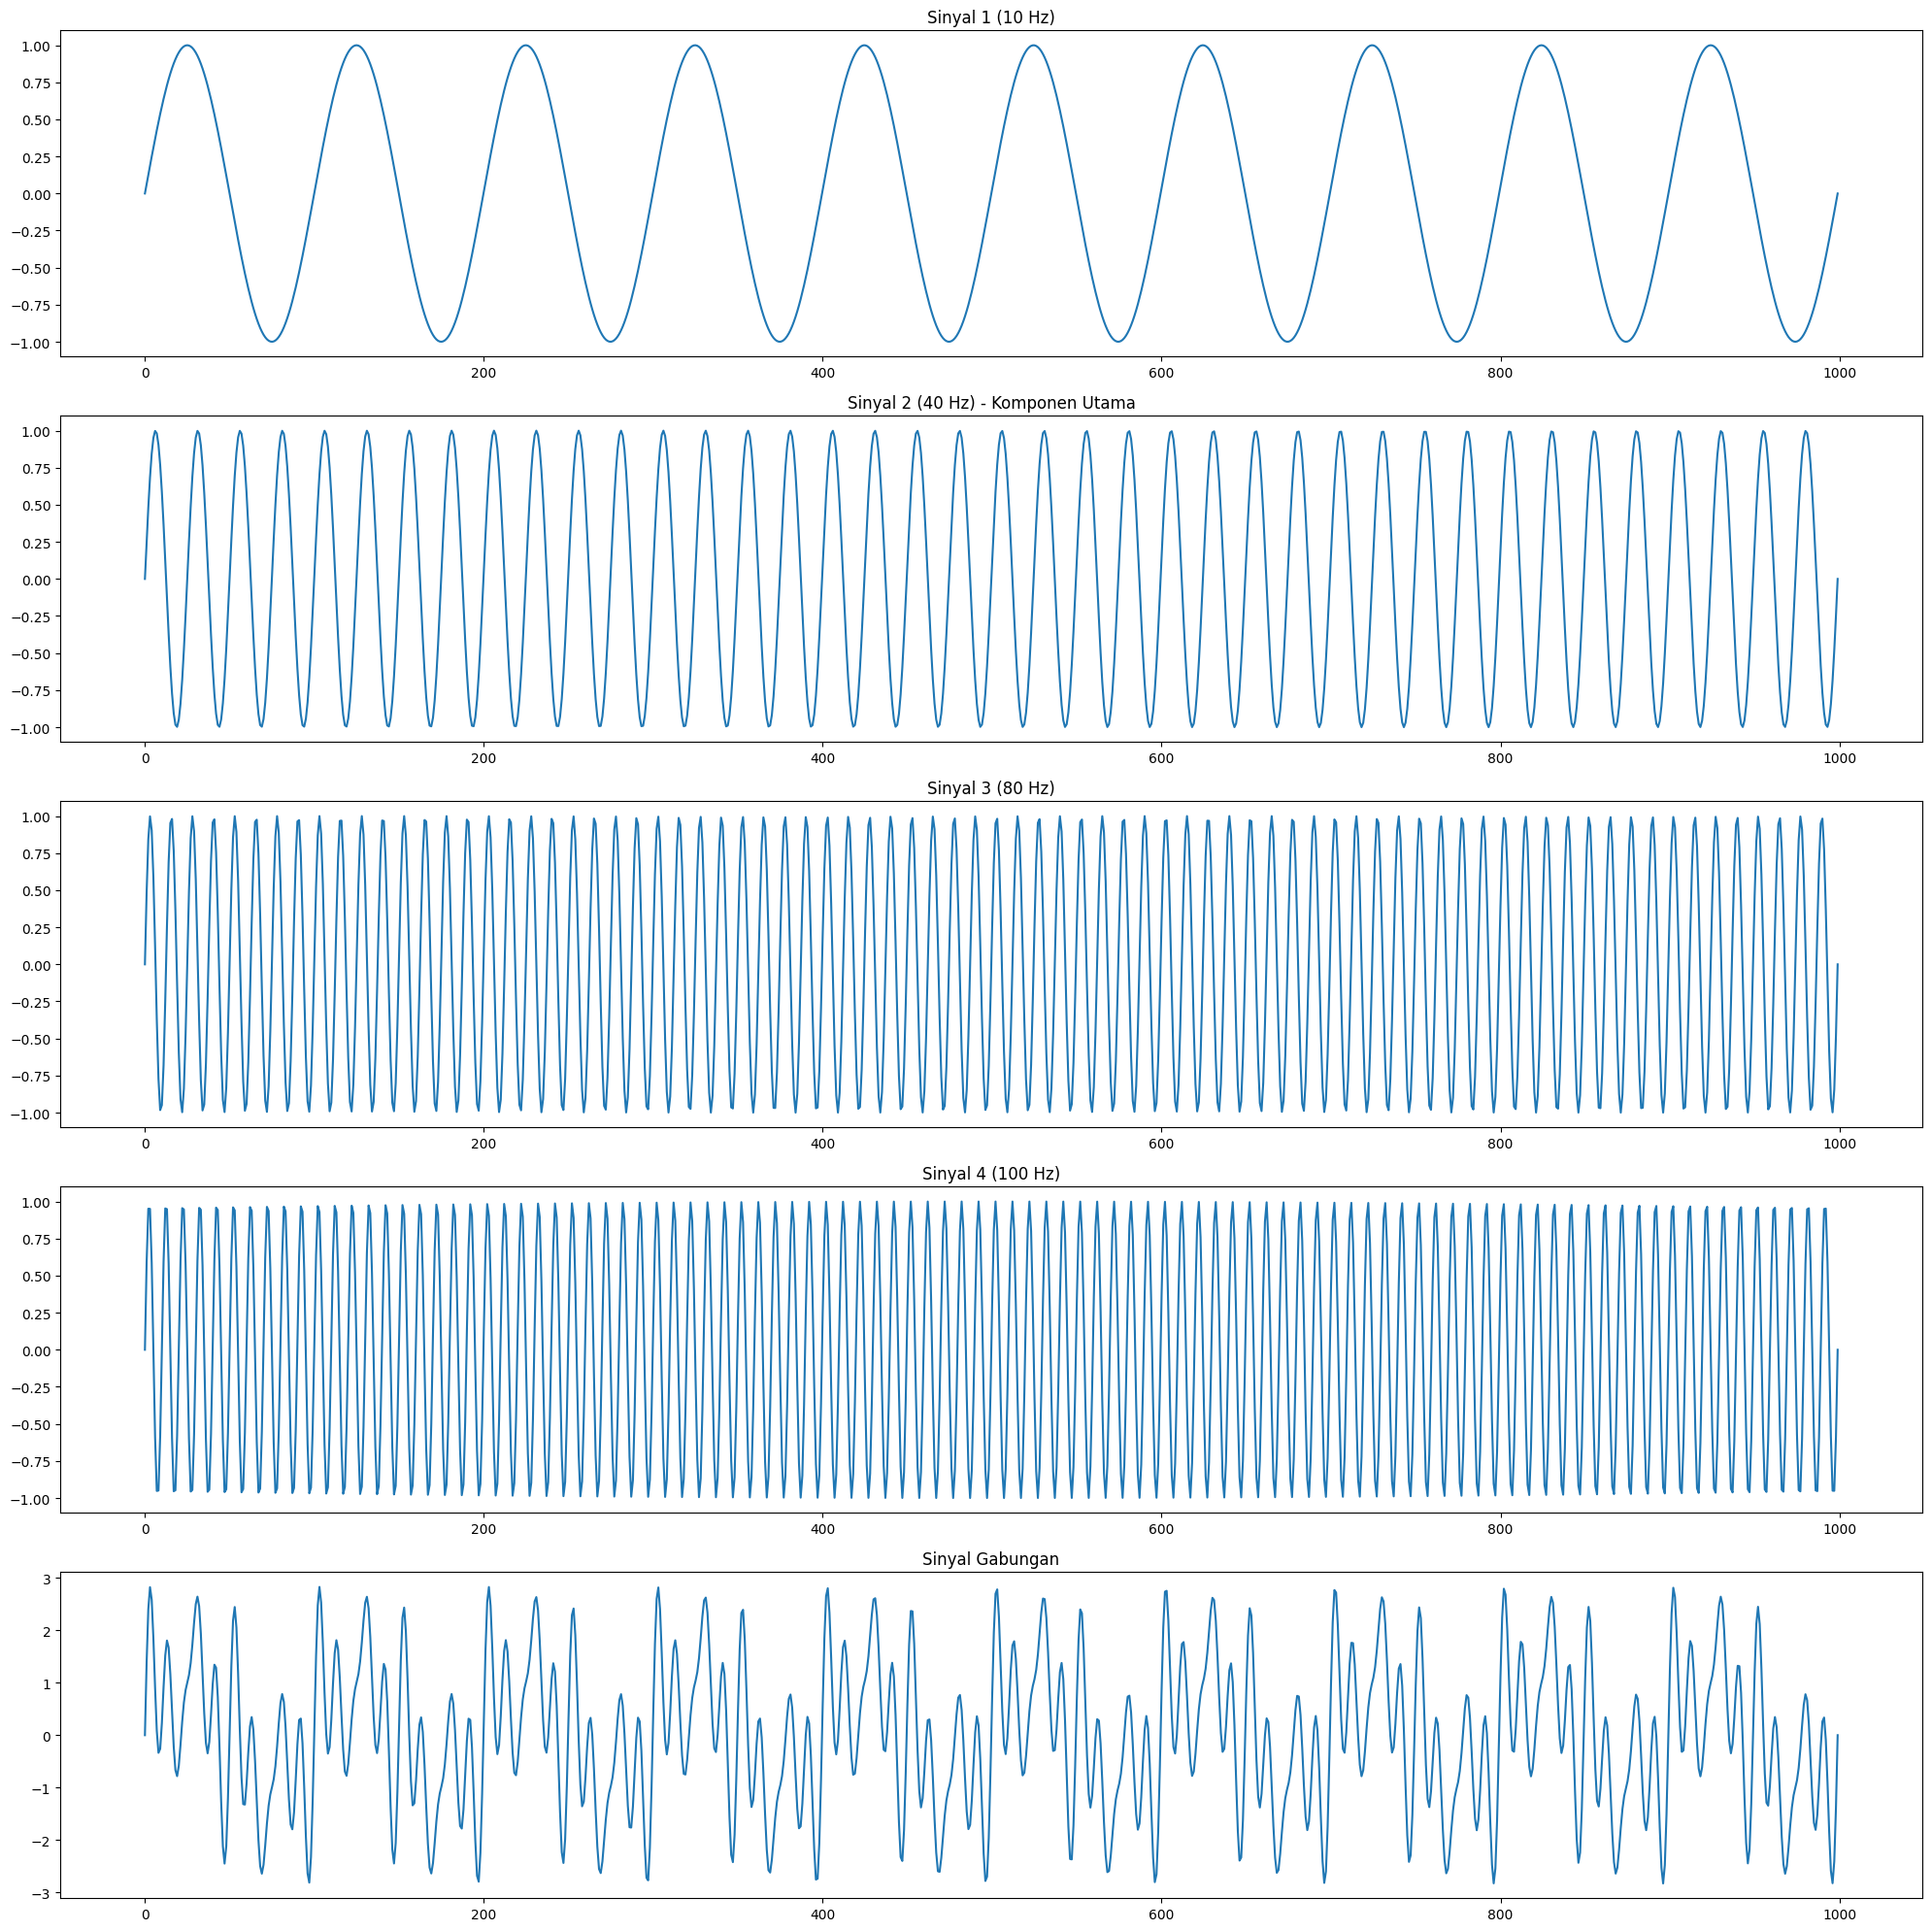

In [6]:
fs = 1000
time_axis = np.linspace(0, 1, fs)

sinyal_1 = np.sin(2 * np.pi * 10 * time_axis) # 10 Hz
sinyal_2 = np.sin(2 * np.pi * 40 * time_axis) # 40 Hz
sinyal_3 = np.sin(2 * np.pi * 80 * time_axis) # 80 Hz
sinyal_4 = np.sin(2 * np.pi * 100 * time_axis) # 100 Hz
sinyal_gabungan = sinyal_1 + sinyal_2 + sinyal_3 + sinyal_4

fig, ax = plt.subplots(5, 1, figsize=(20, 20))
ax[0].plot(sinyal_1)
ax[0].set_title("Sinyal 1 (10 Hz)")
ax[1].plot(sinyal_2)
ax[1].set_title("Sinyal 2 (40 Hz) - Komponen Utama")
ax[2].plot(sinyal_3)
ax[2].set_title("Sinyal 3 (80 Hz)")
ax[3].plot(sinyal_4)
ax[3].set_title("Sinyal 4 (100 Hz)")
ax[4].plot(sinyal_gabungan)
ax[4].set_title("Sinyal Gabungan")
plt.tight_layout()
plt.show()

### Bagaimana kalau yang difilter adalah sinyal non-stasioner (sinyal yang frekuensinya berubah-ubah)?

Mari kita pakai contoh sinyal ECG

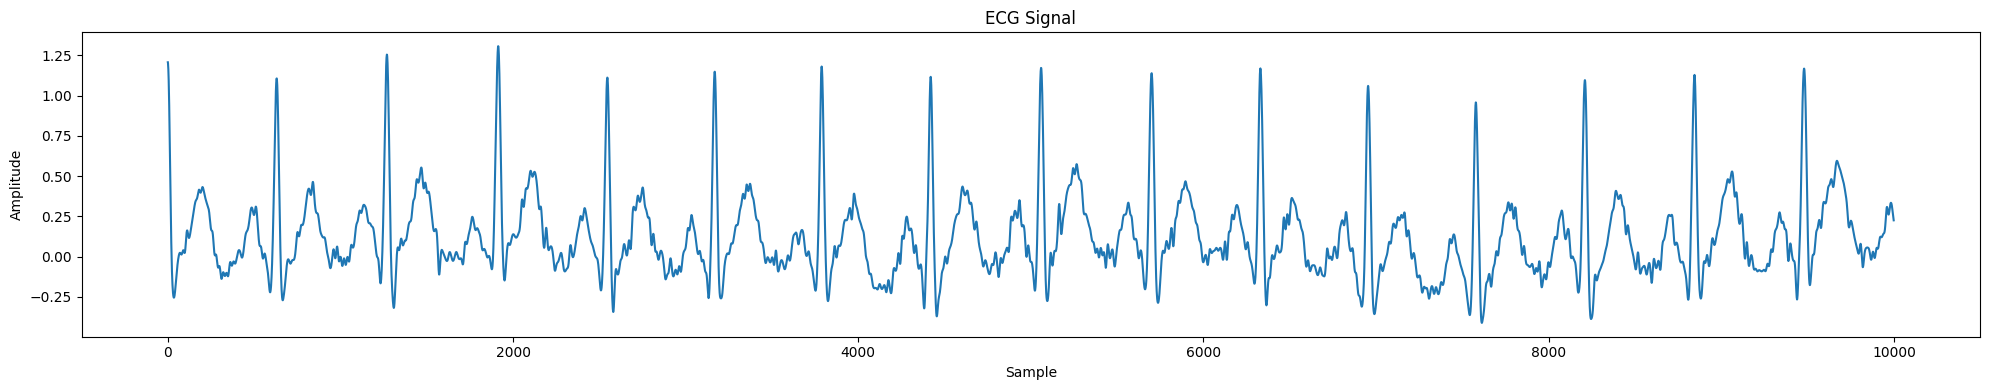

In [7]:
import neurokit2 as nk

fs = 1000
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=fs, heart_rate=95, noise=0.1, random_state=2102045)
plt.figure(figsize=(20, 4))
plt.plot(ecg_signal)
plt.title("ECG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

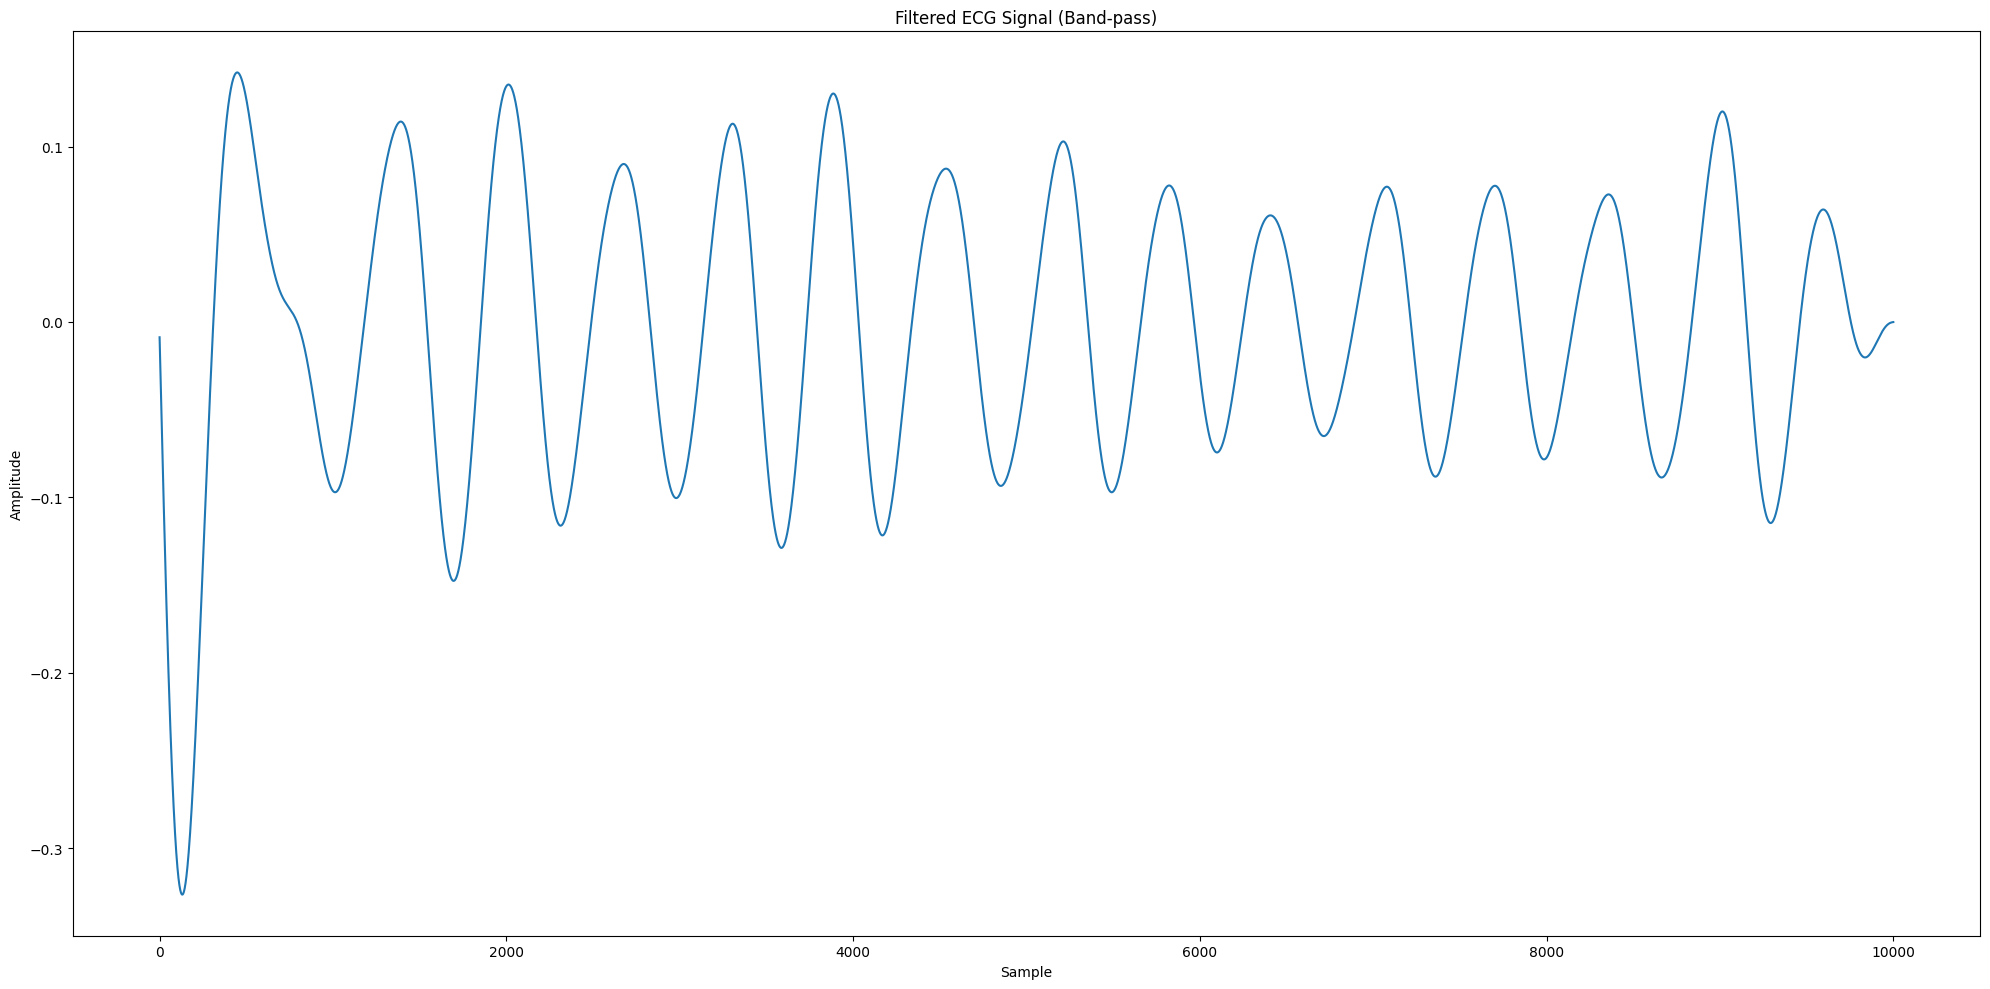

In [8]:
## Doing some filtering
b, a = signal.butter(2, [1.2, 2.3], fs=fs, btype="band", analog=False)
ecg_filt_band = signal.filtfilt(b, a, ecg_signal)

plt.figure(figsize=(20,10))
plt.plot(ecg_filt_band)
plt.title("Filtered ECG Signal (Band-pass)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()